In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [31]:
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [32]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [33]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [34]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [35]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 66s 67ms/step - loss: 2.0779 - accuracy: 0.4534 - val_loss: 0.7347 - val_accuracy: 0.7924
Epoch 2/15
981/981 [==============================] - 95s 97ms/step - loss: 0.9285 - accuracy: 0.7160 - val_loss: 0.4354 - val_accuracy: 0.8772
Epoch 3/15
981/981 [==============================] - 130s 133ms/step - loss: 0.6998 - accuracy: 0.7819 - val_loss: 0.2709 - val_accuracy: 0.9253
Epoch 4/15
981/981 [==============================] - 113s 116ms/step - loss: 0.5504 - accuracy: 0.8315 - val_loss: 0.2073 - val_accuracy: 0.9382
Epoch 5/15
981/981 [==============================] - 104s 106ms/step - loss: 0.4513 - accuracy: 0.8628 - val_loss: 0.1736 - val_accuracy: 0.9517
Epoch 6/15
981/981 [==============================] - 96s 98ms/step - loss: 0.4165 - accuracy: 0.8739 - val_loss: 0.1187 - val_accuracy: 0.9688
Epoch 7/15
981/981 [==============================] - 102s 104ms/step - loss: 0.3900 - accuracy: 0.8825 - val_loss: 0.1201 - val_a

ImportError: `save_model` requires h5py.

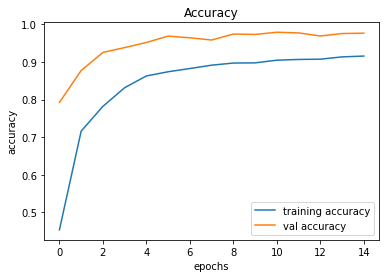

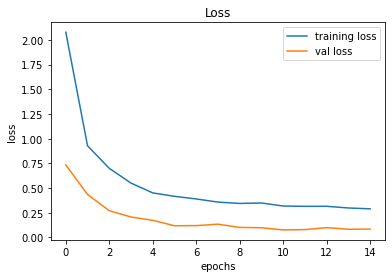

In [40]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict(X_test)
classes = np.argmax(pred,axis=1)


In [51]:
#Accuracy with the test data
from sklearn.metrics import r2_score
r2_score(labels,classes)

0.9405803187584573